# **import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **We read the data**

In [ ]:
data = pd.read_csv('/content/LoanApproval_train.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,LP002626,Male,Yes,0,Graduate,Yes,2479,3013.0,188.0,360.0,1.0,Urban,Y
509,LP002634,Female,No,1,Graduate,No,13262,0.0,40.0,360.0,1.0,Urban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural,N
511,LP002640,Male,Yes,1,Graduate,No,6065,2004.0,250.0,360.0,1.0,Semiurban,Y


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            513 non-null    object 
 1   Gender             503 non-null    object 
 2   Married            510 non-null    object 
 3   Dependents         501 non-null    object 
 4   Education          513 non-null    object 
 5   Self_Employed      486 non-null    object 
 6   ApplicantIncome    513 non-null    int64  
 7   CoapplicantIncome  513 non-null    float64
 8   LoanAmount         495 non-null    float64
 9   Loan_Amount_Term   499 non-null    float64
 10  Credit_History     470 non-null    float64
 11  Property_Area      513 non-null    object 
 12  Loan_Status        513 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.2+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,513.0,5497.013645,6486.147388,150.0,2876.0,3846.0,5746.0,81000.0
CoapplicantIncome,513.0,1537.364366,2144.079038,0.0,0.0,1210.0,2283.0,20000.0
LoanAmount,495.0,144.739394,83.200278,17.0,100.0,127.0,163.0,700.0
Loan_Amount_Term,499.0,343.118236,63.375911,12.0,360.0,360.0,360.0,480.0
Credit_History,470.0,0.846809,0.360556,0.0,1.0,1.0,1.0,1.0


In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,10
Married,3
Dependents,12
Education,0
Self_Employed,27
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,18
Loan_Amount_Term,14


# **We handle null values**

Gender = object = fill (mode)

Married = object  = fill(mode)

Dependents = object = fill(mode)

Self_Employed =  object = fill(mode)

LoanAmount = int = fill(median)

Loan_Amount_Term = int = fill (median)

Credit_History = int = fill(median)



In [ ]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [ ]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


# **Data Visualizations**

# Exploartory data Analysis **~EDA~**

# Finding Numerical Columns

In [ ]:
num = data.select_dtypes(['int64','float64'])
correlation_matrix = num.corr()
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.111976,0.575456,-0.071709,-0.035742
CoapplicantIncome,-0.111976,1.000000,0.227638,0.014786,-0.017273
LoanAmount,0.575456,0.227638,1.000000,0.028050,-0.021125
Loan_Amount_Term,-0.071709,0.014786,0.028050,1.000000,0.012362
Credit_History,-0.035742,-0.017273,-0.021125,0.012362,1.000000


We create a heat map of the correlation matrix between the digital columns By Heatmap

<Axes: >

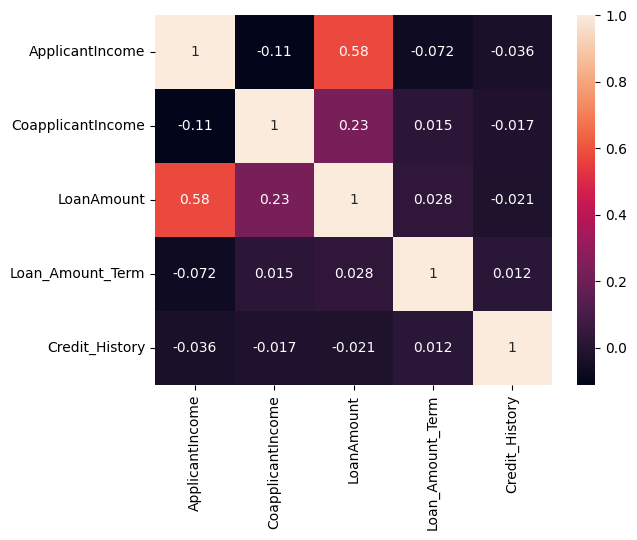

In [ ]:
sns.heatmap(correlation_matrix , annot = True  )

# **Finding Categorical Data**

In [ ]:
for i in data.columns:
  x = data[i].value_counts()
  print(x)
  print()

Loan_ID
LP001002    1
LP001854    1
LP002140    1
LP002139    1
LP002138    1
           ..
LP001577    1
LP001574    1
LP001572    1
LP001570    1
LP002643    1
Name: count, Length: 513, dtype: int64

Gender
Male      419
Female     94
Name: count, dtype: int64

Married
Yes    333
No     180
Name: count, dtype: int64

Dependents
0     307
1      84
2      82
3+     40
Name: count, dtype: int64

Education
Graduate        403
Not Graduate    110
Name: count, dtype: int64

Self_Employed
No     446
Yes     67
Name: count, dtype: int64

ApplicantIncome
2500    8
2600    6
6000    5
4583    5
4166    5
       ..
3497    1
4344    1
5708    1
3522    1
3283    1
Name: count, Length: 426, dtype: int64

CoapplicantIncome
0.0       229
1666.0      5
2083.0      5
5625.0      3
2500.0      3
         ... 
1769.0      1
736.0       1
1964.0      1
1619.0      1
2035.0      1
Name: count, Length: 244, dtype: int64

LoanAmount
127.0    21
120.0    19
100.0    13
160.0    12
110.0    12
         ..


In [ ]:
cat = data[['Gender' ,'Married' ,'Dependents' , 'Education' ,'Self_Employed','Credit_History' ,'Property_Area' ,'Loan_Status']]
cat

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
508,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
509,Female,No,1,Graduate,No,1.0,Urban,Y
510,Male,No,0,Not Graduate,No,1.0,Rural,N
511,Male,Yes,1,Graduate,No,1.0,Semiurban,Y


In [ ]:
for i in cat.columns:
  x = cat[i].value_counts()
  print(x)
  print()

Gender
Male      419
Female     94
Name: count, dtype: int64

Married
Yes    333
No     180
Name: count, dtype: int64

Dependents
0     307
1      84
2      82
3+     40
Name: count, dtype: int64

Education
Graduate        403
Not Graduate    110
Name: count, dtype: int64

Self_Employed
No     446
Yes     67
Name: count, dtype: int64

Credit_History
1.0    441
0.0     72
Name: count, dtype: int64

Property_Area
Semiurban    192
Urban        176
Rural        145
Name: count, dtype: int64

Loan_Status
Y    355
N    158
Name: count, dtype: int64



# **Plotting a Pie Chart for Categorical Data**

# ***To know the distribution in categories***
# **use Pie chart**


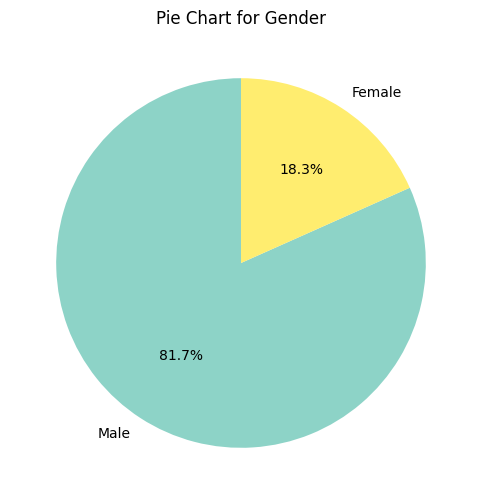

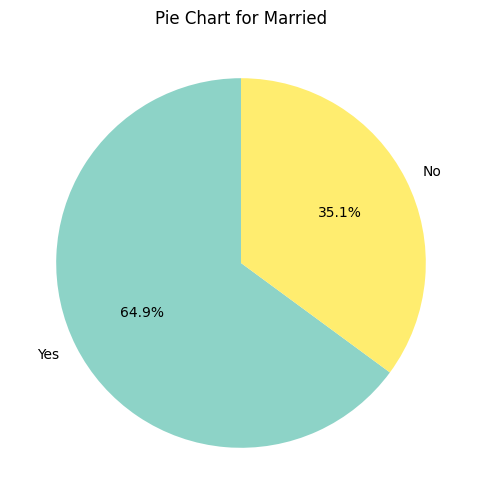

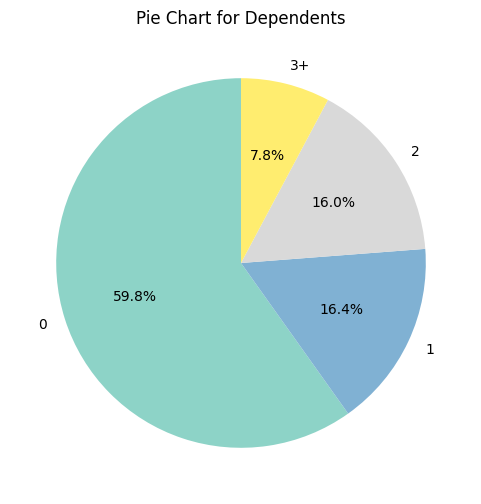

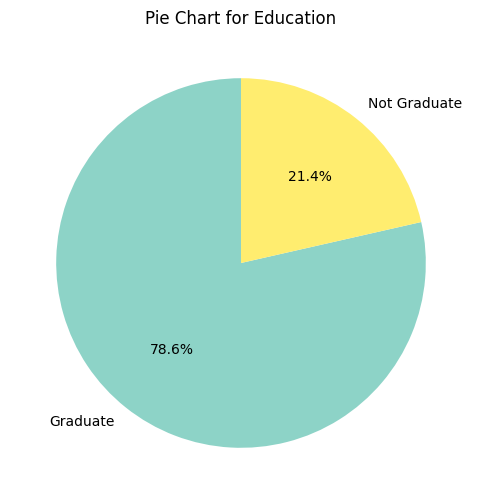

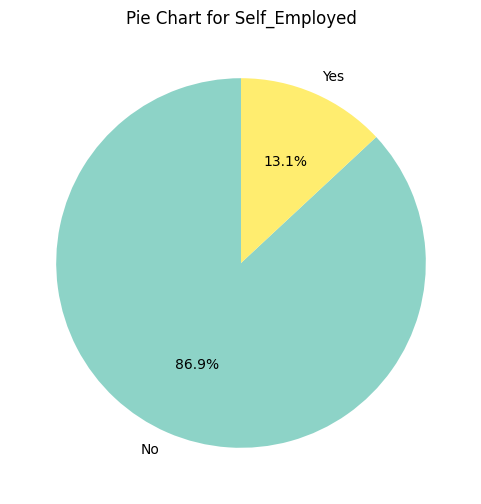

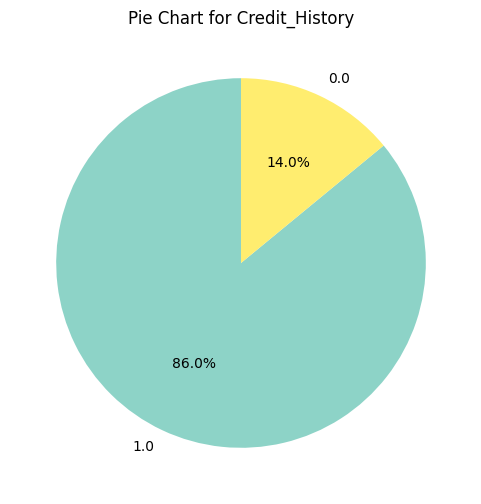

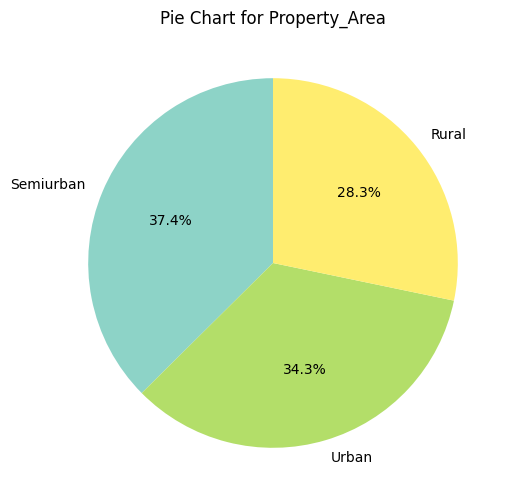

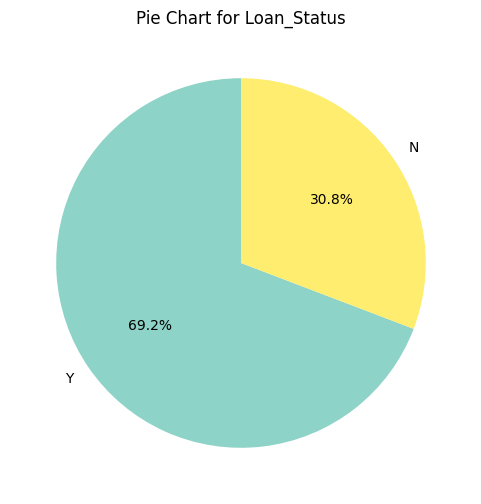

In [ ]:

for col in cat.columns:
    plt.figure(figsize=(6, 6))
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap="Set3")
    plt.title(f"Pie Chart for {col}")
    plt.ylabel('')
    plt.show()

# **Plotting Bar chart for Categorical** **Data**

<Axes: xlabel='Gender'>

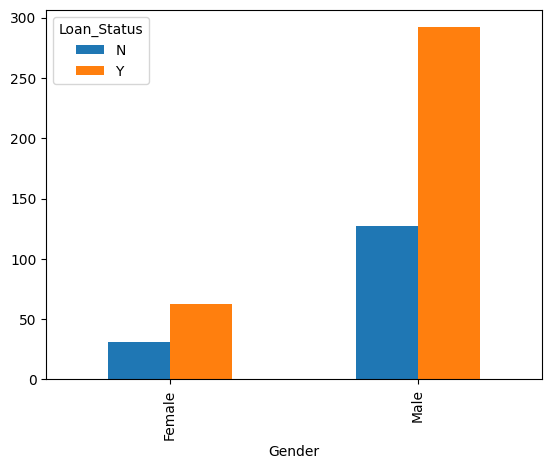

In [ ]:
Gender = pd.crosstab(data['Gender'] , data['Loan_Status'])  # before normalize
Gender.plot(kind='bar')

*`Before normalization`*, the chart showed that the acceptance rate for men

was higher than for women.

Here, the acceptance rate for each category (men or women) was calculated

 `out of the total dataset.`

<Axes: xlabel='Gender'>

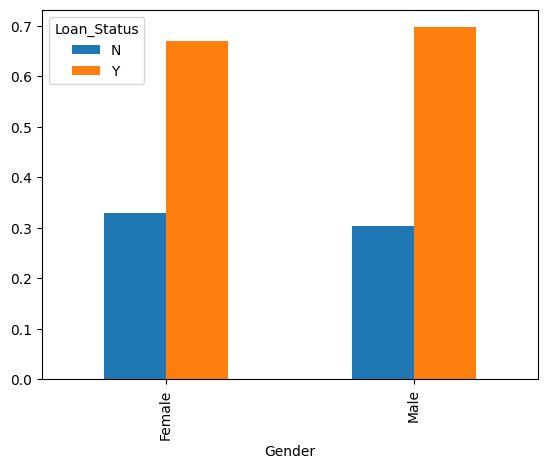

In [ ]:
Gender = pd.crosstab(data['Gender'] , data['Loan_Status'] ,normalize='index') #after normalize
Gender.plot(kind='bar')

*`After normalization`*, we observe that the acceptance rate for each

category is similar to the other.

From the chart, we conclude that the percentage of male applicants for

the loan is much higher than that of female applicants.

Male applicants make up `81.7%` of the total.

The rejection rate for male applicants is less than 50%.

Female applicants account for `18.3% ` of the total.

The rejection rate for female applicants is 50%








# **We compare the target with all categories**

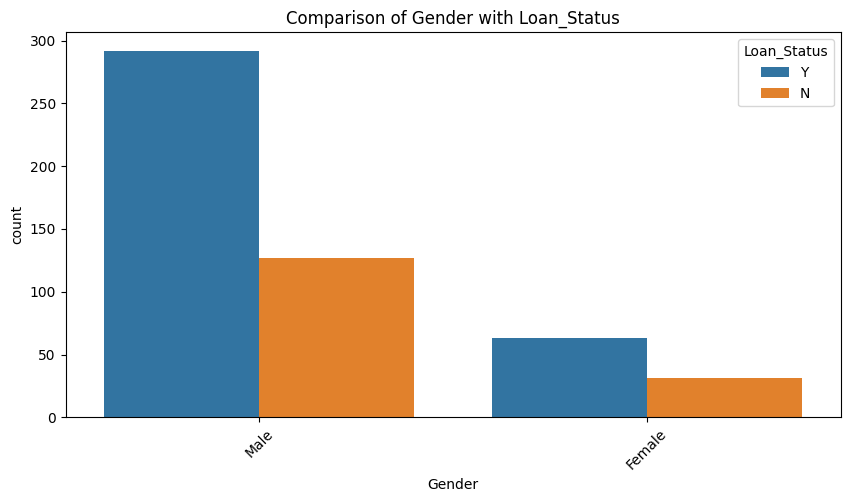

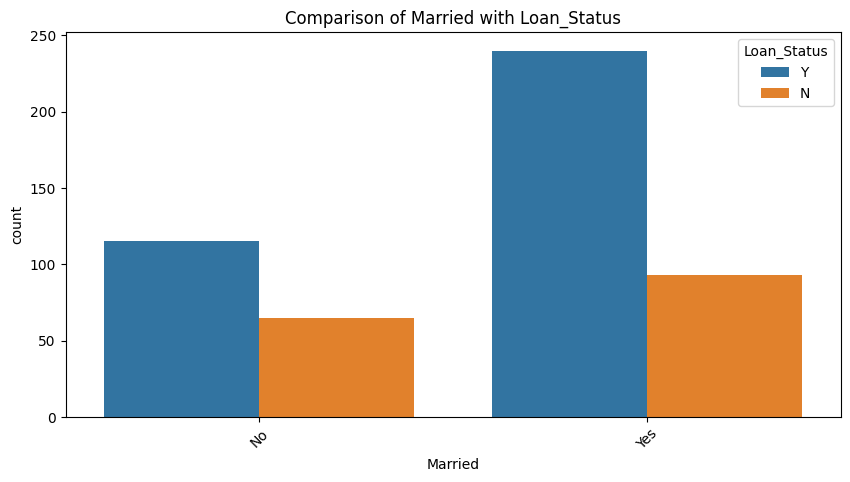

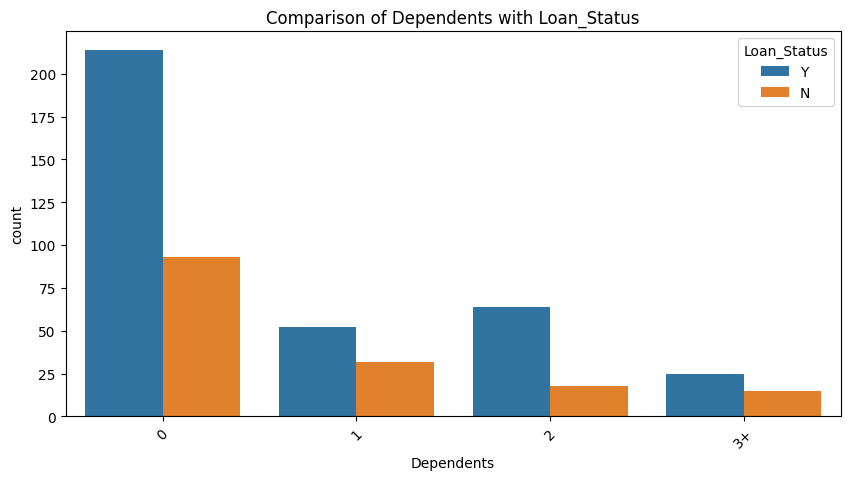

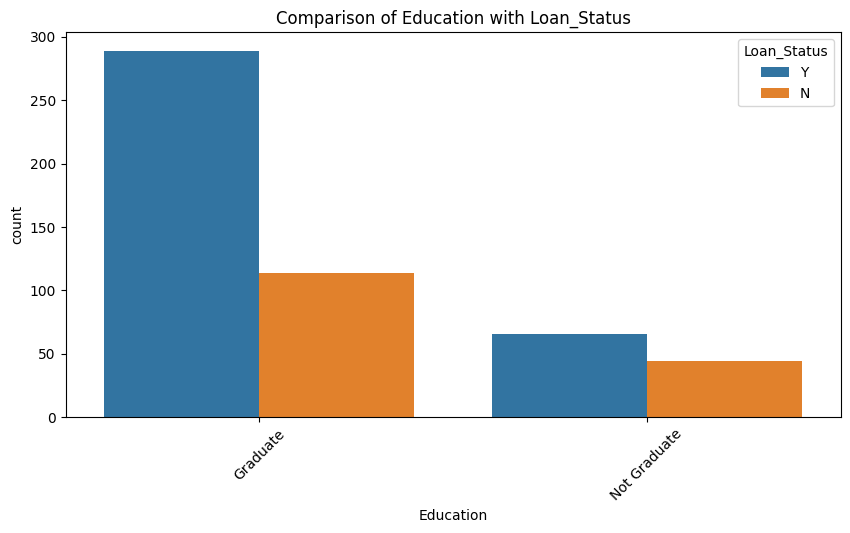

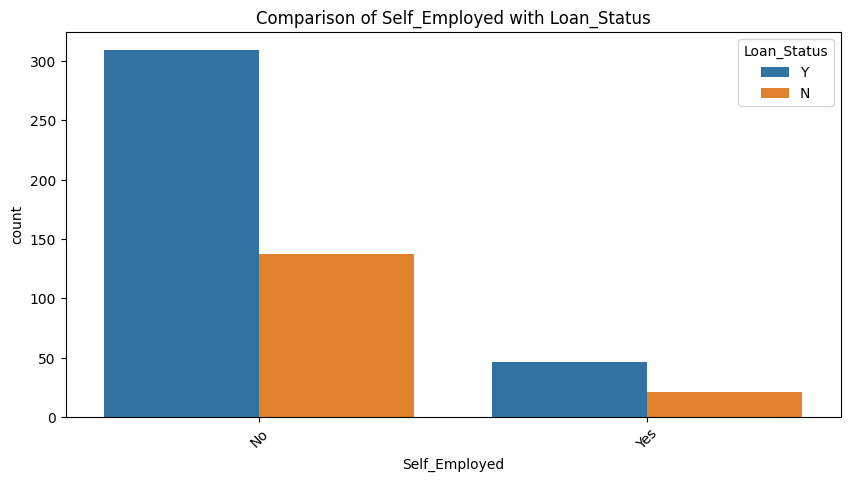

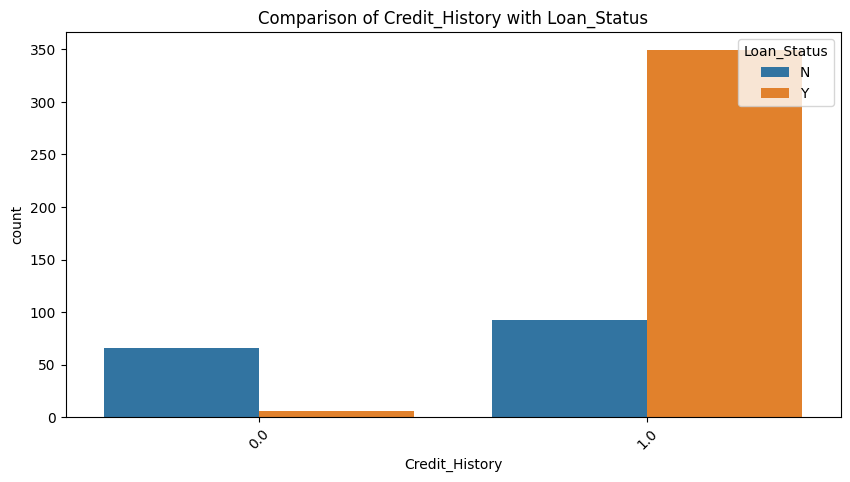

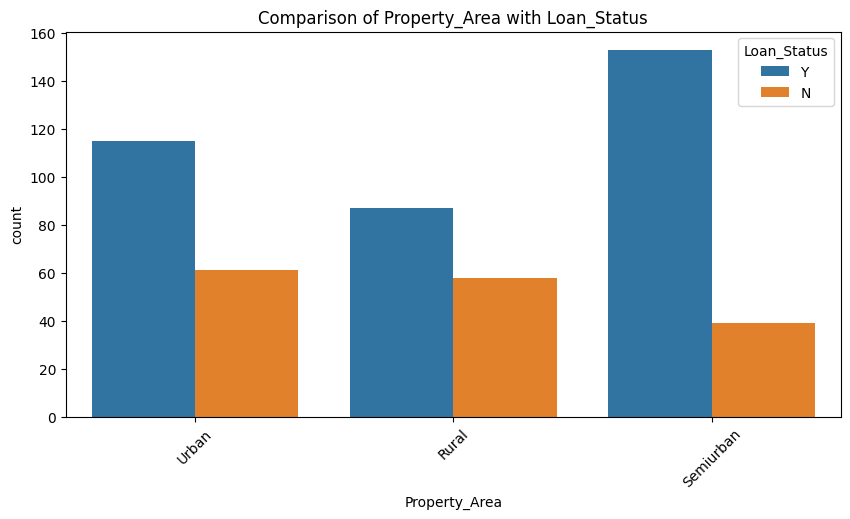

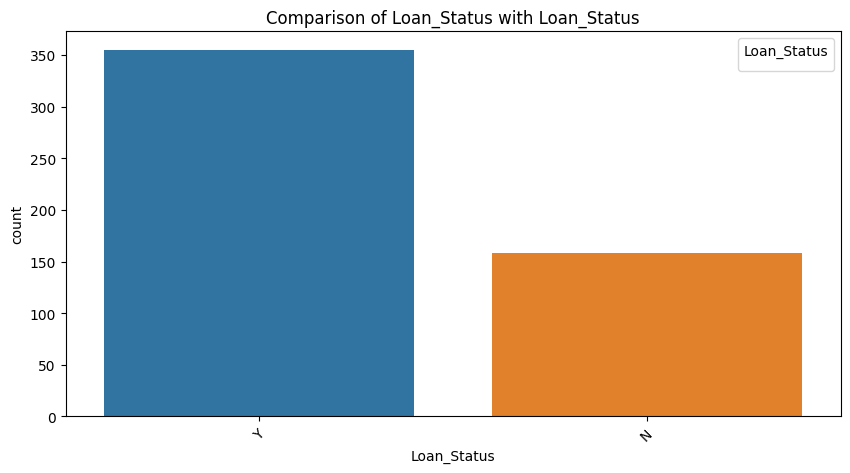

In [ ]:
# #Plotting Bar = count

for col in cat.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=cat, x=col, hue='Loan_Status')
    plt.title(f'Comparison of {col} with Loan_Status')
    plt.xticks(rotation=45)
    plt.legend(title='Loan_Status', loc='upper right')
    plt.show()

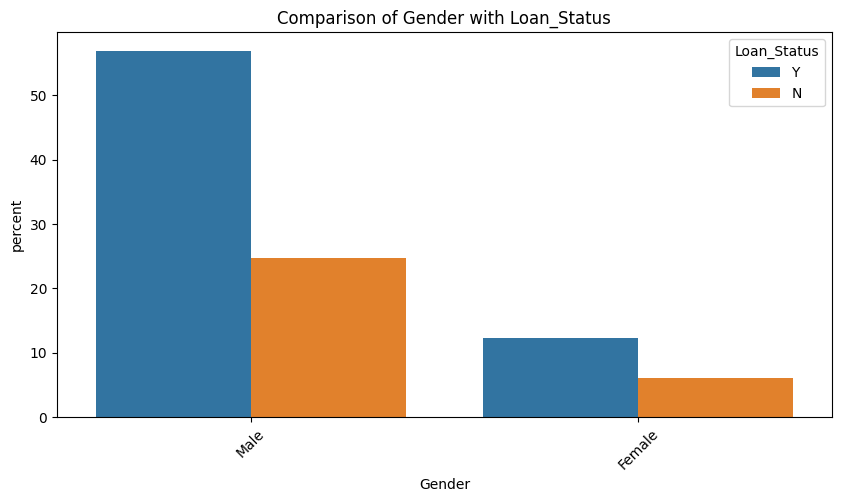

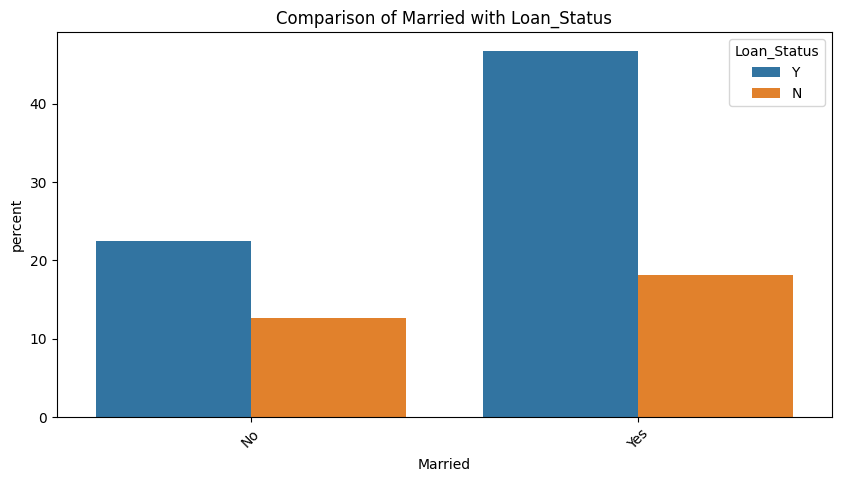

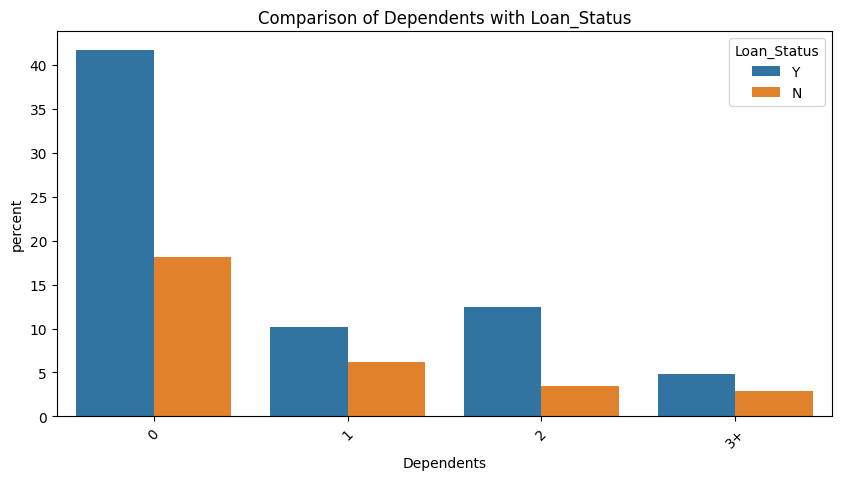

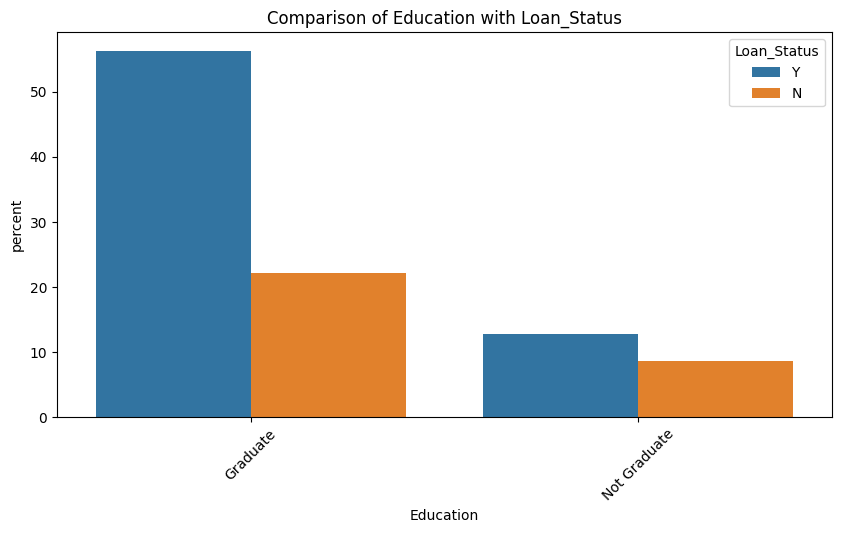

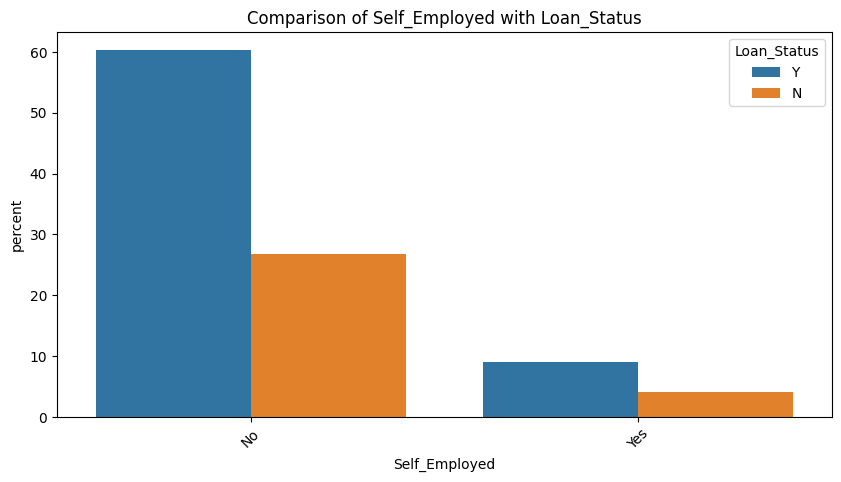

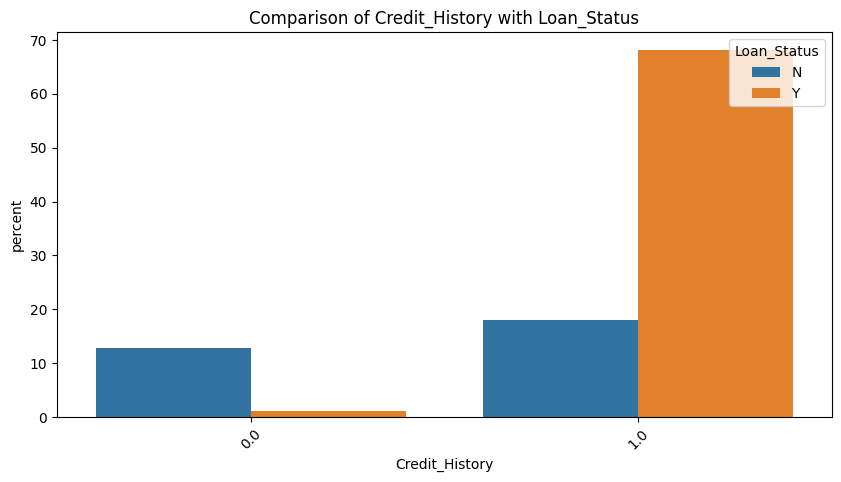

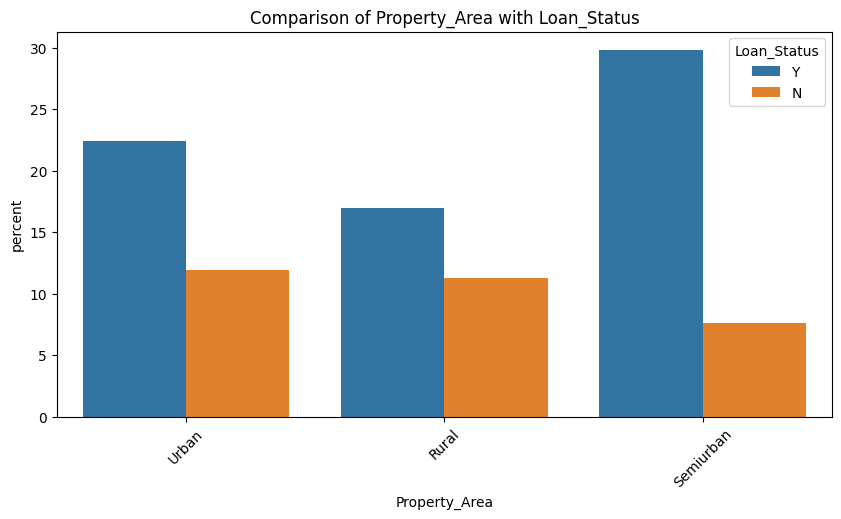

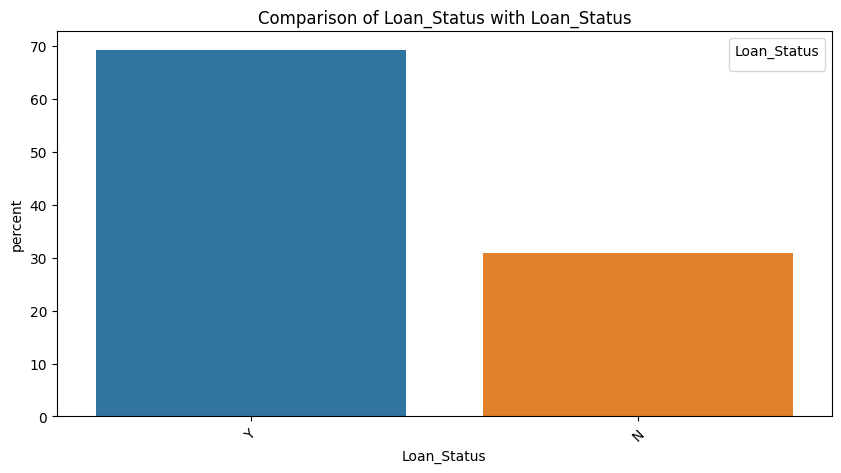

In [ ]:
#Plotting Bar = %

for col in cat.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=cat, x=col, hue='Loan_Status', stat='percent')
    plt.title(f'Comparison of {col} with Loan_Status')
    plt.xticks(rotation=45)
    plt.legend(title='Loan_Status', loc='upper right')
    plt.show()



# **We analyze the results of the graphs:**

# :1-Comparing Married Applicants with Loan Status:

Comparing the loan status with` married applicants, who make up 64% `of the total

loan applicants

 and `unmarried applicants, who make up 35%` , we observe that married

applicants are more likely to apply for financial loans than single applicants.

Thus, married applicants receive loans more often than single ones.

The rejection rate for married applicants is less than 50%, while for single applicants, the rejection rate is greater than 50%.

# 2-Comparing Loan Status with Dependent Groups:

`"First Case:Applicants with No Dependents"`

Applicants with no dependents make up 59% of the dependent category.

They represent the largest proportion of loan applicants among all dependency

cases, and most of them receive loan approval.

The rejection rate for this group is less than 50%.

`"Second Case: Applicants with One Dependent"`

Applicants in this case constitute 16.4% of the dependent category.

The approval rate is higher than the rejection rate by less than 50%.

However, the rejection rate for this group is over 50%.

`"Third Case: Applicants with Two Dependents"`

Applicants in the third case make up 16% of the dependent category.

The approval rate in this group is significantly higher than the rejection rate.

The rejection rate is approximately 25%.

`"Fourth Case: Applicants with Three Dependents"`

Applicants in the fourth case represent 7.8% of the dependent category.

The approval rate is higher than the rejection rate by less than 50%.

However, the rejection rate in this group is over 50%.

# 3-Education Category (Graduates / Non-Graduates):

`The percentage of graduates applying for loans is 78.6%`, with most receiving

 approval, and the rejection rate among graduates is less than 50%.

`The percentage of non-graduates applying for loans is 21.4%.` The approval rate

 slightly exceeds the rejection rate among non-graduates, with approximately

 75% being accepted.


# 4- Category (Self-Employed / Non-Self-Employed):

`The percentage of self-employed applicants seeking loans is 31.1%`, with the

 majority receiving approval. The rejection rate among self-employed applicants

 is around 40%.

`The percentage of non-self-employed applicants seeking loans is 86.9%`, with

 most receiving approval, and the rejection rate among them is less than 50%.

# Credit History Category:

`Group 1:`

Those without a credit history"

Applicants in Group 1 constitute 14%.

All of them were rejected, with none receiving approval for a loan.

`Group 2:`

Those with a credit history"

Applicants in Group 2 constitute 86%.

Most of them were approved, with the approval rate being significantly higher

than the rejection rate.

The ratio of rejected applicants to approved ones is approximately 30%.


# 5-Applicants by Region:

`Urban:`

 Applicants from this region make up 34.3% of the total, with most receiving

 approval. The rejection rate compared to approvals is approximately 48%.

`Rural:`

The number of applicants approved for a loan from this region is slightly

higher than those rejected. The rejection rate compared to approvals is 60%,

and applicants from this region constitute 28.3% of the total.

`Semiurban:`

Applicants from this region make up 37.4% of the total, with the majority

receiving approval. The rejection rate compared to approvals is 25%.

# 6-Overall Loan Approval or Rejection Rates:

`Total Loan Approvals`: 69.2%

`Total Loan Rejections`: 30.8%












# **Histogram**

We will use histograms to represent all `numerical columns` to understand

the data` distribution across these columns.`

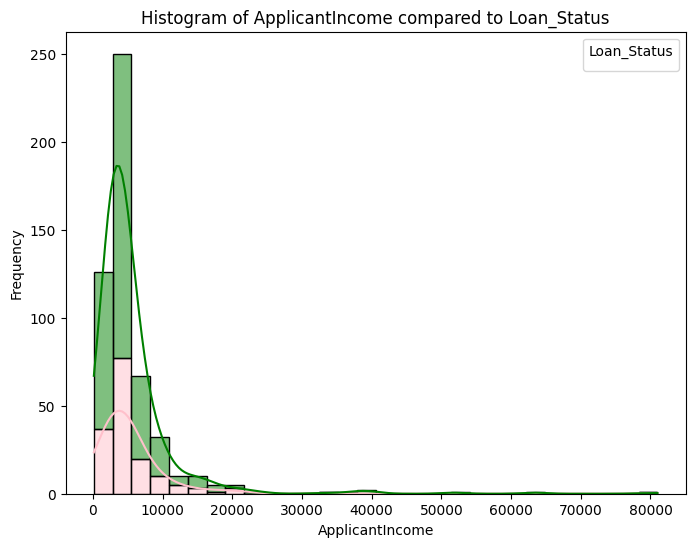

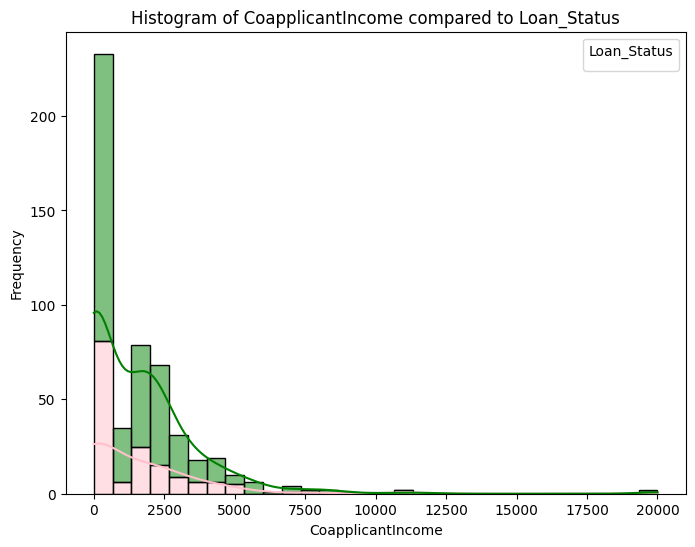

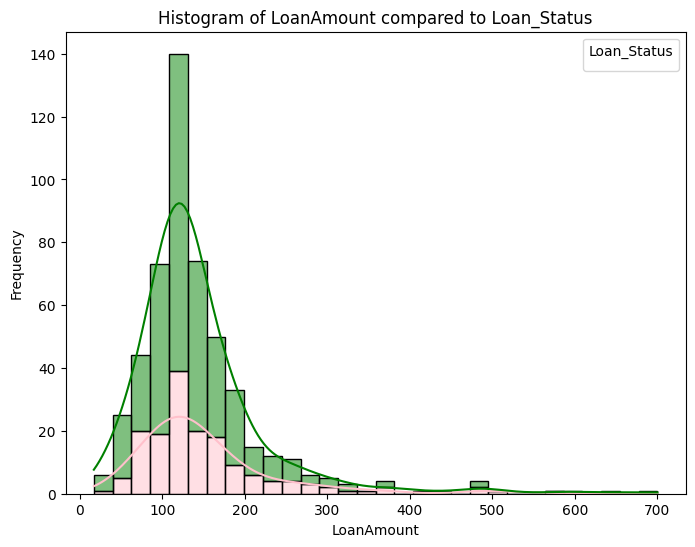

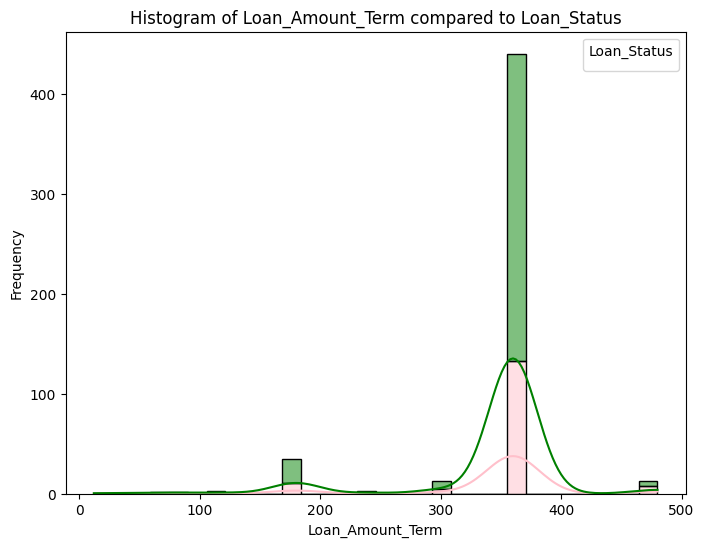

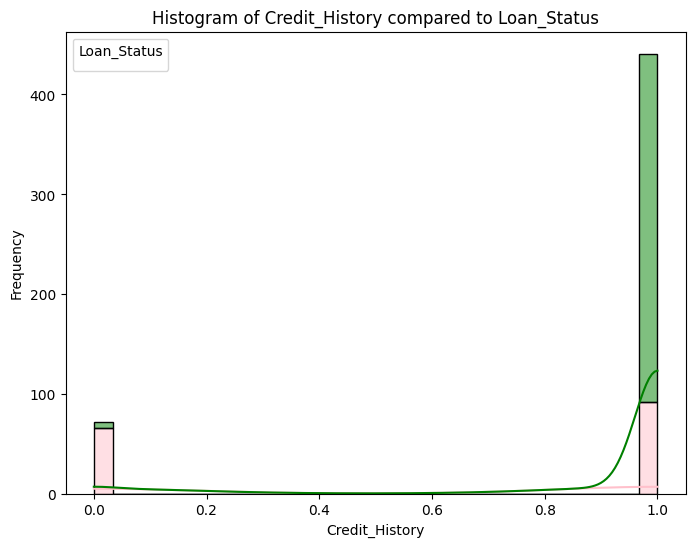

In [ ]:

custom_palette = {'Y': 'green', 'N': 'pink'}
for col in num.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=col, hue='Loan_Status', multiple="stack", kde=True, palette=custom_palette, bins=30)
    plt.title(f"Histogram of {col} compared to Loan_Status")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend(title='Loan_Status')
    plt.show()

sns.histplot(data=data, x=col, hue='Loan_Status', multiple="stack", kde=True, palette=custom_palette, bins=30)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

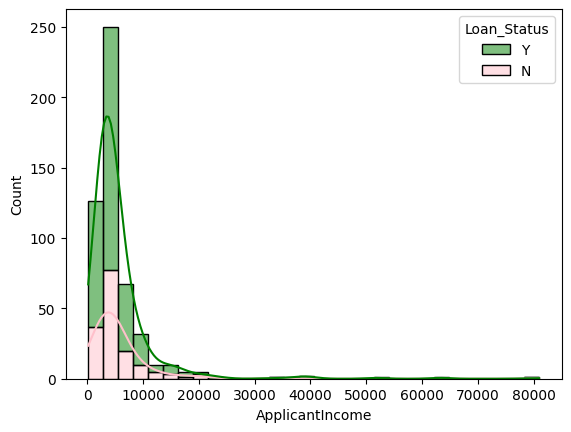

In [ ]:
sns.histplot(data=data, x= 'ApplicantIncome' , hue='Loan_Status', multiple="stack", kde=True, palette=custom_palette, bins=30)


# ***`Loan approval status based on applicants income`***

We observe that as the income value increases, a person becomes more eligible

for a loan. The relationship between a person’s income and loan approval rate

is directly proportional.

Additionally, most loan applicants have an income below 10,000, and the number

of approvals falls between 70 and 180."

In [ ]:
num

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,127.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
508,2479,3013.0,188.0,360.0,1.0
509,13262,0.0,40.0,360.0,1.0
510,3598,1287.0,100.0,360.0,1.0
511,6065,2004.0,250.0,360.0,1.0


<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

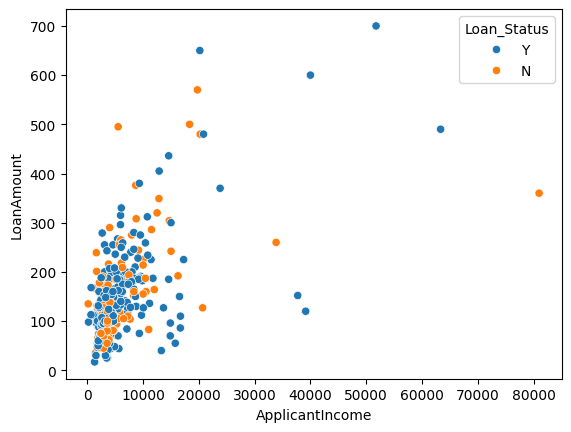

In [ ]:
sns.scatterplot(data = data , x = 'ApplicantIncome' , y = 'LoanAmount' , hue='Loan_Status')

# ***`The relationship between employee income and loan amount based on loan`***

# ***`approval status:`***

The chart shows that most loan applicants have a monthly income below 10,000.

 The most requested loan amounts range between 100 and 200. Since blue

 indicates loan approval, we can also conclude that most loan applications for

  those with an income of 5,000 fall between 100 and 200, with a high approval
  



We observe some outlier approvals (in blue) for individuals with an income of

40,000, indicating that as income increases, the likelihood of loan approval

also rises.


# **Encoding**

**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

non_num = data.select_dtypes(exclude=['float64', 'int64']).columns
label_encoder = LabelEncoder()
for col in non_num :
    data[col] = label_encoder.fit_transform(data[col])
print(data.head())

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  0.000000     1.0      0.0    0.000000        0.0            0.0   
1  0.001953     1.0      1.0    0.333333        0.0            0.0   
2  0.003906     1.0      1.0    0.000000        0.0            1.0   
3  0.005859     1.0      1.0    0.000000        1.0            0.0   
4  0.007812     1.0      0.0    0.000000        0.0            0.0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072210             0.0000    0.181429              0.75   
1         0.056580             0.0754    0.182857              0.75   
2         0.037037             0.0000    0.094286              0.75   
3         0.031889             0.1179    0.171429              0.75   
4         0.074074             0.0000    0.201429              0.75   

   Credit_History  Property_Area  Loan_Status  
0             1.0            1.0          1.0  
1             1.0            0.0          0.0  
2       

# **Scalling data  === Maximum Value of each columns ( 0 - 1 )**

In [ ]:
data_max = data.max()
data_max
data = data.divide(data_max)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.000000,1.0,0.0,0.000000,0.0,0.0,0.072210,0.0000,0.181429,0.75,1.0,1.0,1.0
1,0.001953,1.0,1.0,0.333333,0.0,0.0,0.056580,0.0754,0.182857,0.75,1.0,0.0,0.0
2,0.003906,1.0,1.0,0.000000,0.0,1.0,0.037037,0.0000,0.094286,0.75,1.0,1.0,1.0
3,0.005859,1.0,1.0,0.000000,1.0,0.0,0.031889,0.1179,0.171429,0.75,1.0,1.0,1.0
4,0.007812,1.0,0.0,0.000000,0.0,0.0,0.074074,0.0000,0.201429,0.75,1.0,1.0,1.0


# **`By Rasha Alzaher`**